## Buckeye Description

### paper objective

- Explore phonetical variation

## Annotations

## Speech Disorder

aphasia, dysarthria, apraxia

## For query phone, words, etc 

https://pypi.org/project/praat-textgrids/

https://github.com/kylebgorman/textgrid

With R, but it seems to be design to query across multiple corpus 

- https://ips-lmu.github.io/EMU.html
- https://ips-lmu.github.io/The-EMU-SDMS-Manual/

## Proportion function and content words

**Maybe these approach can be used to analysis/predict impairment in Cohelo**

| Title                                                                                  | Link                                                                                                                                                                                                                                                                                         | What it says about function vs. content words & impairment                                                                                                                                                                                                                                 | Year                           |
| -------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------------ |
| **The Assessment of Aphasia and Related Disorders** (Goodglass, Kaplan)                | [https://books.google.com/books/about/The_Assessment_of_Aphasia_and_Related_Di.html?id=lNULAQAAMAAJ](https://books.google.com/books/about/The_Assessment_of_Aphasia_and_Related_Di.html?id=lNULAQAAMAAJ)                                                                                     | **Explicit**: In agrammatic (non-fluent) aphasia, speech is characterized by **loss or omission of function words** (articles, prepositions, auxiliaries) with relative preservation of content words → “telegraphic speech”. This implies a **shift in proportion toward content words**. | 1972 (multiple later editions) |
| **Aphasia: A Clinical Perspective** (Menn & Obler)                                     | [https://www.cambridge.org/core/books/aphasia/6D3E6E3E87F56D6D3C5F4E6D8C0B2E4A](https://www.cambridge.org/core/books/aphasia/6D3E6E3E87F56D6D3C5F4E6D8C0B2E4A)                                                                                                                               | **Explicit (linguistic level)**: Describes systematic reduction of grammatical morphemes and function words in Broca’s aphasia; content words dominate output. Proportion change is discussed qualitatively, not statistically.                                                            | 1990                           |
| **Motor Speech Disorders** (Joseph R. Duffy)                                           | [https://shop.elsevier.com/books/motor-speech-disorders/duffy/978-0-443-11031-3](https://shop.elsevier.com/books/motor-speech-disorders/duffy/978-0-443-11031-3)                                                                                                                             | **Implicit (motor/phonetic level)**: Reduced, unstressed, short elements (typical of function words) degrade first in dysarthria/apraxia. Predicts **greater vulnerability of function words**, but does not compute ratios.                                                               | 1995 (latest ed. 2020)         |
| **Agrammatism** (overview article)                                                     | [https://en.wikipedia.org/wiki/Agrammatism](https://en.wikipedia.org/wiki/Agrammatism)                                                                                                                                                                                                       | **Explicit (clinical description)**: Hallmark is omission of function words and inflections, yielding content-heavy utterances. Clear qualitative statement of **function-word reduction relative to content words**.                                                                      | Concept formalized 1970s       |
| **A Course in Phonetics** (Ladefoged & Johnson)                                        | [https://books.google.com/books/about/A_Course_in_Phonetics.html?id=FjLc1XtqJUUC](https://books.google.com/books/about/A_Course_in_Phonetics.html?id=FjLc1XtqJUUC)                                                                                                                           | **Indirect**: Explains why function words are shorter, reduced, and unstressed, making them **less robust** acoustically. Does not discuss disorders directly, but provides the phonetic mechanism underlying disproportionate loss.                                                       | 1975 (latest ed. 2014)         |
| **Acoustic and Auditory Phonetics** (Keith Johnson)                                    | [https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781118868874](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781118868874)                                                                                                     | **Indirect → predictive**: Shows that high-frequency function words undergo extreme reduction and segment deletion. Implies that any impairment affecting timing/control will disproportionately affect function words.                                                                    | 2011                           |
| **The Buckeye Corpus of Conversational Speech** (Pitt et al.)                          | [https://buckeyecorpus.osu.edu/pubs/BuckeyeCorpus.pdf](https://buckeyecorpus.osu.edu/pubs/BuckeyeCorpus.pdf)                                                                                                                                                                                 | **Explicit (phonetic variation)**: Function words show **greater phonetic variability, reduction, and boundary ambiguity** than content words. Not a clinical corpus, but establishes the baseline asymmetry exploited in impairment analysis.                                             | 2007                           |
| **Causes of pronunciation reduction in frequent English function words** (Bell et al.) | [https://www.semanticscholar.org/paper/The-causes-of-pronunciation-reduction-in-8458-of-Bell-Johnson/7a94c4b1a0c3e51b7f13c9cbdedc5d5a0b9e1b4a](https://www.semanticscholar.org/paper/The-causes-of-pronunciation-reduction-in-8458-of-Bell-Johnson/7a94c4b1a0c3e51b7f13c9cbdedc5d5a0b9e1b4a) | **Explicit (quantitative)**: Function words are systematically more reduced than content words in conversational speech. Provides empirical grounding for why function words are poor anchors and more error-prone.                                                                        | 2009                           |
| **Clinical Phonetics** (Cambridge Handbook chapter)                                    | [https://www.cambridge.org/core/books/cambridge-handbook-of-phonetics/clinical-phonetics/99CEB538A5F3081263193EC56BD3BCE8](https://www.cambridge.org/core/books/cambridge-handbook-of-phonetics/clinical-phonetics/99CEB538A5F3081263193EC56BD3BCE8)                                         | **Implicit**: Clinical speech errors disproportionately affect weak syllables and reduced segments—properties typical of function words. No direct ratio analysis.                                                                                                                         | 2012                           |


## Import libraries

https://nbviewer.org/github/scjs/buckeye/blob/master/Quickstart.ipynb

In [144]:
import os
import glob

import buckeye
from buckeye.containers import Pause, Word


import pandas as pd
import numpy as np

from IPython.display import Audio

## Config

In [2]:
class cfg: 

    ROOT_RAW_BUKEYES = os.path.join("..", "..", "..",
                                    "data",
                                    "01_Raw",
                                    "01_buckeye",
                                   )
    
                                    

## Utilities

### w_att()

In [188]:
def w_att(w): 
    """
    Description:
    ------------
        From the .word file extracting the attributes of the data instances: 
            
            Pause (attribute name in Buckeye .py : rename in this project) 
                 |  entry      : tag
                 |  beg        : strt
                 |  end        : end
                 |  phones     : phone_t
                 |  dur        : dur
                 |  misaligned : misalgd

            Word (attribute name in Buckeye .py : rename in this project) 
                 |  orthography : tag
                 |  beg         : strt
                 |  end         : end
                 |  phonemic    : phonemic
                 |  phonetic    : phonetic 
                 |  pos         : pos : #part of speech (noun, verb, adj, etc)
                 |  dur         : dur 
                 |  phones      : phone_t
                 |  misaligned  : misalgd


    Parameters: 
    -----------
        w: data instance which holds the speech audio segment at word level 

    Return: 
    ------
        wrd_lvl_seg: list of each word level speech audio segment for word or no word segments. Info list description:
                    - seg: speech audio seg (word or pause)
                    - tag: "orthorgraphy for word instances, or pause tag in case of pause data instances. 
                    - strt: timestamp start
                    - end: timestamp end
                    - dur: duration
                    - pos: part of the speech
                    - phonemic: complete expected phoneme - ARPABET list
                    - phonetic: real phonetic sounds listened by annotator 
                    - phone_t: list of phonetics (phones) with timestamp for start and end. 
                    - misalgd: info about if there is a misaligment
                    
    
    """
    if isinstance(w, Word):
    
        # print('word')
        segm       = "word"
        tag       = w.orthography
        strt      = w.beg
        end       = w.end
        dur       = w.dur
        pos       = w.pos # part of speech (noun, adjective, verb, etc)
        phonemic  = w.phonemic
        phonetic  = w.phonetic
        phone_t   = [(p.seg, p.beg, p.end) for p in w.phones]
        misalgd   = w.misaligned
        
        
    
    elif isinstance(w, Pause):
    
        # print('Pause')
        segm       = "pause"
        tag       = w.entry
        strt      = w.beg
        end       = w.end
        dur       = w.dur
    
        pos       = None
        phonemic  = None
        phonetic  = None
        phone_t   = [(p.seg, p.beg, p.end) for p in w.phones] # it seems to show seg start/end times
    
        misalgd   = w.misaligned

    #_______________________________________________________________________
    return [segm,
            tag,
            strt,
            end,
            dur,
            pos,
            phonemic,
            phonetic,
            phone_t,
            misalgd,
           ]
    

## Buckeye

In [3]:
%%time
fpath = os.path.join(cfg.ROOT_RAW_BUKEYES, "data",
                     "Speaker 01",
                     "s01.zip",
                    )

# load_wavs to load or now the wav audio.                    
speaker = buckeye.Speaker.from_zip(fpath, load_wavs=False)
speaker                     
                     
                     

CPU times: user 158 ms, sys: 134 ms, total: 292 ms
Wall time: 1.34 s


Speaker("s01")

In [4]:
print(speaker.name)
print(speaker.sex) # f for female, m for male
print(speaker.age) # o for old, y for young
print(speaker.interviewer) # f for female, m for male

s01
f
y
f


In [5]:
cfg.ROOT_RAW_BUKEYES

'../../../data/01_Raw/01_buckeye'

In [6]:
for track in speaker:
    print(track.name)

s0101a
s0101b
s0102a
s0102b
s0103a


In [7]:
print(speaker.tracks)

[Track("s0101a"), Track("s0101b"), Track("s0102a"), Track("s0102b"), Track("s0103a")]


In [8]:
track = speaker[0]
track

Track("s0101a")

### Words

Word instances have these nine attributes:

- `orthography` - the word's spelling
- `beg` - the timestamp when the word begins (relative to the start of the track), in seconds
- `end` - the timestamp when the word ends
- `dur` - the duration of the word
- `phonemic` - the canonical transcription
- `phonetic` - the close transcription
- `pos` - the word's part of speech
- `misaligned` - marked as True if the word has a negative duration, or if the phonetic transcription doesn't match what's in the .phones file
- `phones` - a list of references to Phone instances that have the labels and timestamps for the phonetic transcription

In [9]:
# This instance is a list of each annotation at word level for the audio s0101a
#   Annotation for the inverviwer is ommited

track.words[:15]

[Pause('{B_TRANS}', 0.0, 0.102385),
 Pause('<SIL>', 0.102385, 4.275744),
 Pause('<NOISE>', 4.275744, 8.513518),
 Pause('<IVER>', 8.513518, 32.216575),
 Word('okay', 32.216575, 32.622045, ['ow', 'k', 'ey'], ['k', 'ay'], 'NN'),
 Pause('<IVER>', 32.622045, 37.129002),
 Pause('<VOCNOISE>', 37.129002, 38.123014),
 Pause('<IVER>', 38.123014, 44.617996),
 Word('um', 44.617996, 44.946848, ['ah', 'm'], ['ah', 'm'], 'UH'),
 Pause('<SIL>', 44.946848, 45.355708),
 Word("i'm", 45.355708, 45.501487, ['ay', 'm'], ['ay', 'm'], 'PRP_VBP'),
 Pause('<EXCLUDE-name>', 45.501487, 46.266905),
 Pause('<VOCNOISE>', 46.266905, 46.423155),
 Pause('<SIL>', 46.423155, 46.616192),
 Pause("<EXT-I've>", 46.616192, 47.307796)]

In [10]:
print(f"{track.words[4].orthography}")
print(f"{track.words[4].beg}")
print(f"{track.words[4].end}")
print(f"{track.words[4].phonemic}")
print(f"{track.words[4].phonetic}")
print(f"{track.words[4].pos}") # Part of speech. Default is None.

okay
32.216575
32.622045
['ow', 'k', 'ey']
['k', 'ay']
NN


In [11]:
help(track.words[3])

Help on Pause in module buckeye.containers object:

class Pause(builtins.object)
 |  Pause(entry=None, beg=None, end=None)
 |  
 |  A non-speech entry in the Buckeye Corpus.
 |  
 |  Some kinds of non-speech entries are: silences, breaths, laughs,
 |  speech errors, the beginning or end of a track, or others. These are
 |  all indicated with `{}` or `<>` braces in the transcription file.
 |  
 |  Parameters
 |  ----------
 |  entry : str, optional
 |      A written label for this entry, such as `<SIL>` for a silence.
 |      Default is None.
 |  
 |  beg : float, optional
 |      Timestamp where the entry begins. Default is None.
 |  
 |  end : float, optional
 |      Timestamp where the entry ends. Default is None
 |  
 |  Attributes
 |  ----------
 |  entry
 |  beg
 |  end
 |  phones
 |  dur
 |  misaligned
 |  
 |  Methods defined here:
 |  
 |  __init__(self, entry=None, beg=None, end=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self

In [12]:
track.words[4].orthography

'okay'

In [13]:
help(track.words[4])

Help on Word in module buckeye.containers object:

class Word(builtins.object)
 |  Word(orthography, beg, end, phonemic=None, phonetic=None, pos=None)
 |  
 |  A word entry in the Buckeye Corpus.
 |  
 |  Parameters
 |  ----------
 |  orthography : str
 |      Written form of the word, or another label for this entry.
 |  
 |  beg : float
 |      Timestamp where the word begins.
 |  
 |  end : float
 |      Timestamp where the word ends.
 |  
 |  phonemic : list of str, optional
 |      Transcription of the word's dictionary or citation form. Default
 |      is None.
 |  
 |  phonetic : list of str, optional
 |      Close phonetic transcription of the word. Default is None.
 |  
 |  pos : str, optional
 |      Part of speech. Default is None.
 |  
 |  Attributes
 |  ----------
 |  orthography
 |  beg
 |  end
 |  phonemic
 |  phonetic
 |  pos
 |  dur
 |  phones
 |  misaligned
 |  
 |  Methods defined here:
 |  
 |  __init__(self, orthography, beg, end, phonemic=None, phonetic=None, pos=

In [14]:
track.words[:3] #it omits interviewer words

[Pause('{B_TRANS}', 0.0, 0.102385),
 Pause('<SIL>', 0.102385, 4.275744),
 Pause('<NOISE>', 4.275744, 8.513518)]

In [15]:
word = track.words[4]

print(f"orthography: {word.orthography}")
print(f"beg: {word.beg}")
print(f"end: {word.end}")
print(f"dur: {word.dur}")
print(f"phonemic: {word.phonemic}")
print(f"phonetic: {word.phonetic}")
print(f"post: {word.pos}")
print(f"misaligned: {word.misaligned}")

orthography: okay
beg: 32.216575
end: 32.622045
dur: 0.4054700000000011
phonemic: ['ow', 'k', 'ey']
phonetic: ['k', 'ay']
post: NN
misaligned: False


In [16]:
track.words[4].phones

[Phone('k', 32.216575, 32.376593), Phone('ay', 32.376593, 32.622045)]

Phones have four attributes:

- `seg` - the pseudo-ARPABET transcription of the phone
- `beg` - the timestamp when the phone begins (relative to the start of the track), in seconds
- `end` - the timestamp when the phone ends
- `dur` - duration

In [17]:
for phone in word.phones:
    print(phone.seg, phone.beg, phone.end, phone.dur)

k 32.216575 32.376593 0.16001800000000088
ay 32.376593 32.622045 0.24545200000000023


In [18]:
pause = track.words[1]

print(f"entry: {pause.entry}"), 
print(f"beg: {pause.beg}"), 
print(f"end: {pause.end}"), 
print(f"dur: {pause.dur}"), 
print(f"misaligned: {pause.misaligned}")

entry: <SIL>
beg: 0.102385
end: 4.275744
dur: 4.1733590000000005
misaligned: False


In [19]:
pause.phones

[Phone('SIL', 0.102385, 4.275744)]

### Phone

In [20]:
for phone in track.phones[0:15]:
    print(phone.seg, phone.beg, phone.end, phone.dur)

{B_TRANS} 0.0 0.102385 0.102385
SIL 0.102385 4.275744 4.1733590000000005
NOISE 4.275744 8.513763 4.238019
IVER 8.513763 32.216575 23.702811999999998
k 32.216575 32.376593 0.16001800000000088
ay 32.376593 32.622045 0.24545200000000023
IVER 32.622045 37.129002 4.506957
VOCNOISE 37.129002 38.123014 0.9940119999999979
IVER 38.123014 44.617996 6.494982
ah 44.617996 44.820731 0.2027350000000041
m 44.820731 44.947098 0.1263669999999948
SIL 44.947098 45.354656 0.40755800000000164
ay 45.354656 45.433683 0.07902700000000351
m 45.433683 45.501487 0.06780399999999531
<EXCLUDE-name> 45.501487 46.266999 0.7655120000000011


### Log

In [21]:
for log in track.log:
    print(log.entry, log.beg, log.end, log.dur)

<VOICE=modal> 0.0 61.142603 61.142603
<VOICE=creaky> 61.142603 61.397647 0.25504399999999805
<VOICE=modal> 61.397647 176.705681 115.30803399999999
<VOICE=creaky> 176.705681 177.442715 0.7370339999999942
<VOICE=modal> 177.442715 208.458474 31.015759000000003
<VOICE=creaky> 208.458474 208.998197 0.5397230000000093
<IVER_overlap-start> 208.998197 218.326046 9.327848999999986
<IVER_overlap-end> 218.326046 218.619639 0.29359300000001554
<IVER_overlap-start> 218.619639 281.4126 62.79296099999999
<IVER_overlap-end> 281.4126 282.015381 0.6027809999999931
<VOICE=modal> 282.015381 283.01414 0.9987590000000068
<VOICE=creaky> 283.01414 283.342991 0.328850999999986
<IVER_overlap-start> 283.342991 286.3691 3.0261090000000195
<IVER_overlap-end> 286.3691 286.587431 0.21833099999997785
<IVER_overlap-start> 286.587431 358.243781 71.65635000000003
<IVER_overlap-end> 358.243781 358.766553 0.5227719999999749
<VOICE=modal> 358.766553 570.891209 212.12465600000002
<VOICE=creaky> 570.891209 570.988848 0.09763

You can call the get_logs() method of a Track to retrieve the log entries that overlap with the given timestamps.

For example, the log entries that overlap with the interval from 60 seconds to 62 seconds can be found like this:

In [22]:
logs = track.get_logs(60.0, 62.0)

for log in logs:
    print(log.entry, log.beg, log.end)

<VOICE=modal> 0.0 61.142603
<VOICE=creaky> 61.142603 61.397647
<VOICE=modal> 61.397647 176.705681


### Txt

In [23]:
track.txt[1]

'okay <IVER>'

### Wav

In [24]:
%%time
fpath = os.path.join(cfg.ROOT_RAW_BUKEYES, "data",
                     "Speaker 01",
                     "s01.zip",
                    )


speaker = buckeye.Speaker.from_zip(fpath, load_wavs=True)
track = speaker[0]

track.wav

CPU times: user 842 ms, sys: 346 ms, total: 1.19 s
Wall time: 1.55 s


In [25]:
# track.clip_wav('myclip.wav', 60.0, 62.0) # this create a .wav file 

In [26]:
# wav is a wave.Wave_read object (from Python’s built-in wave module).
wav = track.wav
wav

In [27]:
# number of frames and channels
n_frames = wav.getnframes()
n_channels = wav.getnchannels()
sampwidth = wav.getsampwidth()  # bytes per sample| 2 bytes = 16 bits

n_frames, n_channels, sampwidth


(9969854, 1, 2)

In [28]:
# read raw bytes
raw = wav.readframes(n_frames)

In [29]:
# map sample width to dtype (Buckeye is usually 16-bit PCM)
dtype = np.int16 if sampwidth == 2 else np.uint8

In [30]:
audio = np.frombuffer(raw, dtype=dtype)

In [31]:
# reshape if stereo
if n_channels > 1:
    audio = audio.reshape(-1, n_channels)

In [32]:
sr = wav.getframerate()
sr

16000

In [33]:
# # optional: normalize to [-1, 1]
# audio = audio.astype(np.float32) / np.iinfo(dtype).max

In [34]:
display(Audio(data=audio[sr*25:sr*35], rate=sr))

### Corpus Generator speaker

In [ ]:
# fpath = os.path.join(cfg.ROOT_RAW_BUKEYES, "speakers",
#                     )
# print(fpath)
# corpus = buckeye.corpus(fpath, load_wavs=True)

In [ ]:
# for speaker in corpus:
#     print(speaker.name, end=' ')

## Looping .Word files

In [171]:
%%time
ROOT = os.path.join(cfg.ROOT_RAW_BUKEYES, "speakers")
for p in glob.glob(os.path.join(ROOT, '*')): 

    #_________________________________________________________
    # load_wavs to load or now the wav audio.                    
    speaker = buckeye.Speaker.from_zip(p, load_wavs=True)

    # Speaker info.
    sID = speaker.name
    sex = speaker.sex
    age = speaker.age
    interviewer = speaker.interviewer
    
    #_________________________________________________________
    # Looping across speaker tracks [Tracks=audio split into pieces]
    for track in speaker:

        trk_name = track.name


        #----------------------------------
        # Extracting tokens from .word file (pauses and words data instances)
        words = track.words

        
        #______________________________________________________
        break
    #==========================================================

    #_________________________________________________________
    break
#==============================================================

CPU times: user 3.04 s, sys: 240 ms, total: 3.28 s
Wall time: 3.73 s


In [175]:
track.name

's0101a'

In [189]:
word_lvl_segs_info = []
for w in words:

    #-------------------------
    # Word level segment info - Extraction
    word_lvl_seg = w_att(w)

    #-------------------------
    # store. 
    word_lvl_segs_info.append(word_lvl_seg)

    #----------------------
    # break
#__________________________
cols = ["segm", "tag", "strt", "end", "dur", "pos", "phonemic", "phonetic", "phone_t", "misalgd",]
d_w_seg_trck = pd.DataFrame(word_lvl_segs_info, columns=cols)
d_w_seg_trck

,segm,tag,strt,end,dur,pos,phonemic,phonetic,phone_t,misalgd
0,pause,{B_TRANS},0.000000,0.102385,0.102385,None,None,None,"[({B_TRANS}, 0.0, 0.102385)]",False
1,pause,<SIL>,0.102385,4.275744,4.173359,None,None,None,"[(SIL, 0.102385, 4.275744)]",False
2,pause,<NOISE>,4.275744,8.513518,4.237774,None,None,None,"[(NOISE, 4.275744, 8.513763)]",False
3,pause,<IVER>,8.513518,32.216575,23.703057,None,None,None,"[(IVER, 8.513763, 32.216575)]",False
4,word,okay,32.216575,32.622045,0.405470,NN,"[ow, k, ey]","[k, ay]","[(k, 32.216575, 32.376593), (ay, 32.376593, 32...",False
...,...,...,...,...,...,...,...,...,...,...
1212,word,i,621.606854,621.751955,0.145101,PRP,[ay],[ay],"[(ay, 621.606854, 621.751955)]",False
1213,word,preferred,621.751955,622.197430,0.445475,VBN,"[p, r, ih, f, er, d]","[p, er, f, er, d]","[(p, 621.751955, 621.892988), (er, 621.892988,...",False
1214,word,family,622.197430,622.767665,0.570235,NN,"[f, ae, m, ah, l, iy]","[f, ae, m, l, iy]","[(f, 622.19743, 622.277125), (ae, 622.277125, ...",False
1215,word,um,622.767665,623.087702,0.320037,UH,"[ah, m]","[ah, m]","[(ah, 622.767665, 623.024644), (m, 623.024644,...",False


In [184]:
help(track)

Help on Track in module buckeye.buckeye object:

class Track(builtins.object)
 |  Track(name, words, phones, log, txt, wav=None)
 |  
 |  Corpus data from one track archive file (e.g., s0101a.zip).
 |  
 |  Use Track.from_zip(path) to initialize a Track from a single zip file.
 |  
 |  Parameters
 |  ----------
 |  name : str
 |      Name of the track file (e.g., 's0101a')
 |  
 |  words : str or file
 |      Path to the .words file associated with this track (e.g.,
 |      's0101a.words'), or an open file(-like) object.
 |  
 |  phones : str or file
 |      Path to the .phones file associated with this track (e.g.,
 |      's0101a.phones'), or an open file(-like) object.
 |  
 |  log : str or file
 |      Path to the .log file associated with this track (e.g.,
 |      's0101a.log'), or an open file(-like) object.
 |  
 |  txt : str or file
 |      Path to the .txt file associated with this track (e.g.,
 |      's0101a.txt'), or an open file(-like) object.
 |  
 |  wav : str or file, o

In [110]:
 # |  entry
 # |  beg
 # |  end
 # |  phones
 # |  dur
 # |  misaligned

 # |  orthography
 # |  beg
 # |  end
 # |  phonemic
 # |  phonetic
 # |  pos
 # |  dur
 # |  phones
 # |  misaligned

In [123]:
w.pos

'UH'

In [105]:
words[:15]

[Pause('{B_TRANS}', 0.0, 0.102385),
 Pause('<SIL>', 0.102385, 4.275744),
 Pause('<NOISE>', 4.275744, 8.513518),
 Pause('<IVER>', 8.513518, 32.216575),
 Word('okay', 32.216575, 32.622045, ['ow', 'k', 'ey'], ['k', 'ay'], 'NN'),
 Pause('<IVER>', 32.622045, 37.129002),
 Pause('<VOCNOISE>', 37.129002, 38.123014),
 Pause('<IVER>', 38.123014, 44.617996),
 Word('um', 44.617996, 44.946848, ['ah', 'm'], ['ah', 'm'], 'UH'),
 Pause('<SIL>', 44.946848, 45.355708),
 Word("i'm", 45.355708, 45.501487, ['ay', 'm'], ['ay', 'm'], 'PRP_VBP'),
 Pause('<EXCLUDE-name>', 45.501487, 46.266905),
 Pause('<VOCNOISE>', 46.266905, 46.423155),
 Pause('<SIL>', 46.423155, 46.616192),
 Pause("<EXT-I've>", 46.616192, 47.307796)]

In [125]:
help(w)

Help on Pause in module buckeye.containers object:

class Pause(builtins.object)
 |  Pause(entry=None, beg=None, end=None)
 |  
 |  A non-speech entry in the Buckeye Corpus.
 |  
 |  Some kinds of non-speech entries are: silences, breaths, laughs,
 |  speech errors, the beginning or end of a track, or others. These are
 |  all indicated with `{}` or `<>` braces in the transcription file.
 |  
 |  Parameters
 |  ----------
 |  entry : str, optional
 |      A written label for this entry, such as `<SIL>` for a silence.
 |      Default is None.
 |  
 |  beg : float, optional
 |      Timestamp where the entry begins. Default is None.
 |  
 |  end : float, optional
 |      Timestamp where the entry ends. Default is None
 |  
 |  Attributes
 |  ----------
 |  entry
 |  beg
 |  end
 |  phones
 |  dur
 |  misaligned
 |  
 |  Methods defined here:
 |  
 |  __init__(self, entry=None, beg=None, end=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self

In [77]:
help(Pause)

Help on class Pause in module buckeye.containers:

class Pause(builtins.object)
 |  Pause(entry=None, beg=None, end=None)
 |  
 |  A non-speech entry in the Buckeye Corpus.
 |  
 |  Some kinds of non-speech entries are: silences, breaths, laughs,
 |  speech errors, the beginning or end of a track, or others. These are
 |  all indicated with `{}` or `<>` braces in the transcription file.
 |  
 |  Parameters
 |  ----------
 |  entry : str, optional
 |      A written label for this entry, such as `<SIL>` for a silence.
 |      Default is None.
 |  
 |  beg : float, optional
 |      Timestamp where the entry begins. Default is None.
 |  
 |  end : float, optional
 |      Timestamp where the entry ends. Default is None
 |  
 |  Attributes
 |  ----------
 |  entry
 |  beg
 |  end
 |  phones
 |  dur
 |  misaligned
 |  
 |  Methods defined here:
 |  
 |  __init__(self, entry=None, beg=None, end=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)

In [69]:
help(track)

Help on Track in module buckeye.buckeye object:

class Track(builtins.object)
 |  Track(name, words, phones, log, txt, wav=None)
 |  
 |  Corpus data from one track archive file (e.g., s0101a.zip).
 |  
 |  Use Track.from_zip(path) to initialize a Track from a single zip file.
 |  
 |  Parameters
 |  ----------
 |  name : str
 |      Name of the track file (e.g., 's0101a')
 |  
 |  words : str or file
 |      Path to the .words file associated with this track (e.g.,
 |      's0101a.words'), or an open file(-like) object.
 |  
 |  phones : str or file
 |      Path to the .phones file associated with this track (e.g.,
 |      's0101a.phones'), or an open file(-like) object.
 |  
 |  log : str or file
 |      Path to the .log file associated with this track (e.g.,
 |      's0101a.log'), or an open file(-like) object.
 |  
 |  txt : str or file
 |      Path to the .txt file associated with this track (e.g.,
 |      's0101a.txt'), or an open file(-like) object.
 |  
 |  wav : str or file, o

In [61]:
print(speaker.name)
print(speaker.sex) # f for female, m for male
print(speaker.age) # o for old, y for young
print(speaker.interviewer) # f for female, m for male

s01
f
y
f


In [68]:
tracks = [track for track in speaker]
print(tracks[0].name)

s0101a


## Query organization DB

https://polyglotdb.readthedocs.io/en/latest/references.html#id9

https://aclanthology.org/2022.sigmorphon-1.8.pdf

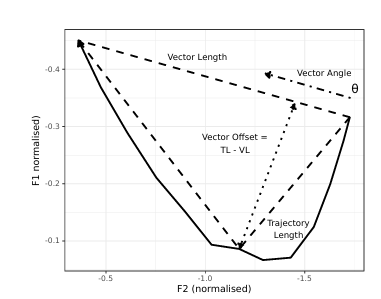
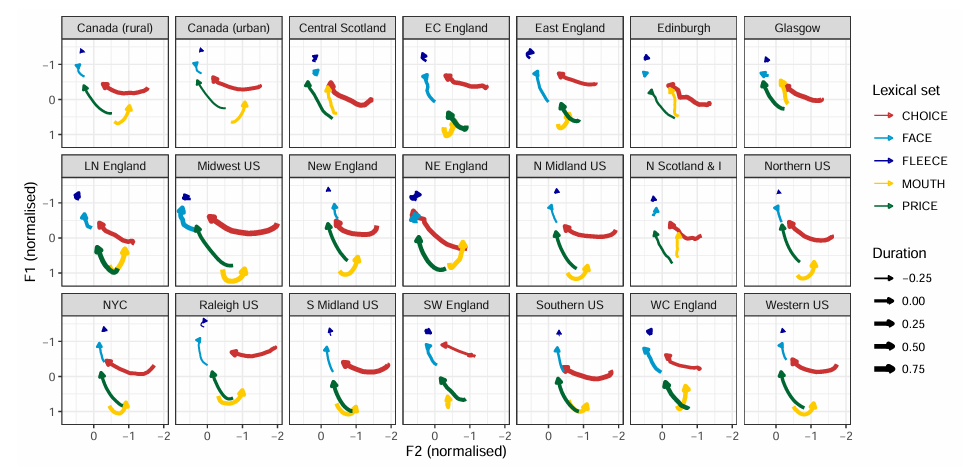
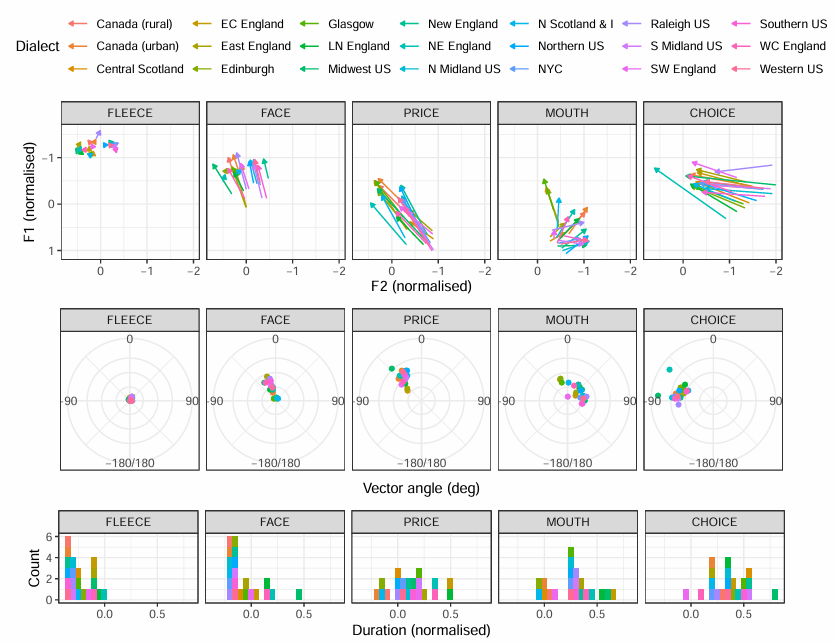